In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords

from keras.regularizers import l2
from keras.layers import BatchNormalization,Dropout
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from sklearn.metrics import accuracy_score

In [18]:
# load data
pd.set_option('display.max_colwidth', None) #display the full text otherwise the text will be truncated
data = pd.read_csv('Suicide_Detection.csv', index_col = [0]) # assign the first column as index
df = data.sample(n=50000, random_state=42) # sampling 50000 rows

In [3]:
def remove_punctuation(text):
    return text.str.replace(r'[^\w\s]', '', regex=True)

In [4]:
# remove stop word
# Download the stopwords
nltk.download('stopwords')

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Define a function to remove stop_words
def remove_stopwords(text):
    filtered_words = [word for word in text.split() if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rose2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Apply the function to the 'text' column
df['text'] = remove_punctuation(df['text'])

In [20]:
# Apply the function to the 'text' column
df['text'] = df['text'].map(remove_stopwords)

In [21]:
# encode the labels
# Define a mapping for unique values
value_mapping = {'suicide': 0, 'non-suicide': 1}

# Use the map function to apply the mapping to the column
df['class'] = df['class'].map(value_mapping)

In [22]:
# find the unique words number in the whole dataset
text= df['text'].str.split().explode()

num_unique_words = len(text.unique())
num_unique_words

101134

In [23]:
X = df['text']
y = df['class']

In [24]:
# vectorized a text corpus by turning each word to a sequence of integer
tok = Tokenizer(num_words=num_unique_words)
tok.fit_on_texts(X)

In [25]:
# get the sequence for taining and validation dataset
X_seq = tok.texts_to_sequences(X)

In [26]:
# pad the sequence to have the same length
max_len = 20

X_padded = pad_sequences(X_seq,maxlen=max_len, padding='post',truncating='post')

X_padded.shape

(50000, 20)

In [31]:
type(y)

pandas.core.series.Series

In [41]:
# Define model architecture
def create_model():
    model = Sequential()
    model.add(Embedding(num_unique_words, 16, input_length=max_len))
    model.add(LSTM(16, dropout=0.8,kernel_regularizer=l2(0.04)))
    model.add(BatchNormalization())  # Add BatchNormalization to fix overfitting
    model.add(Dropout(0.8))
    model.add(Dense(1, activation='sigmoid'))
    return model

Epoch 1/50

Epoch 1: val_accuracy improved from inf to 0.88080, saving model to best_model_fold_0.h5
1250/1250 - 26s - loss: 0.5805 - accuracy: 0.7815 - val_loss: 0.2968 - val_accuracy: 0.8808 - lr: 0.0010 - 26s/epoch - 21ms/step
Epoch 2/50

Epoch 2: val_accuracy did not improve from 0.88080
1250/1250 - 25s - loss: 0.3378 - accuracy: 0.8705 - val_loss: 0.2442 - val_accuracy: 0.9049 - lr: 0.0010 - 25s/epoch - 20ms/step
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.88080
1250/1250 - 25s - loss: 0.3061 - accuracy: 0.8828 - val_loss: 0.2758 - val_accuracy: 0.8875 - lr: 0.0010 - 25s/epoch - 20ms/step
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.88080
1250/1250 - 25s - loss: 0.2880 - accuracy: 0.8935 - val_loss: 0.2493 - val_accuracy: 0.9019 - lr: 0.0010 - 25s/epoch - 20ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.88080 to 0.87390, saving model to best_model_fold_0.h5
1250/1250 - 25s - loss: 0.2740 - accuracy: 0.8975 - val_loss: 0.3024 - val_accuracy: 0.87

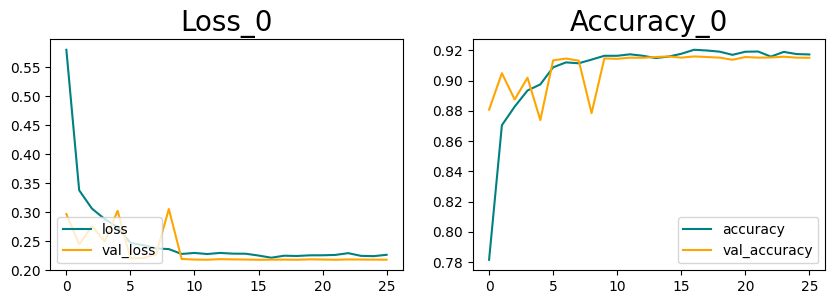

313/313 [==============================] - 2s 4ms/step
Epoch 1/50

Epoch 1: val_accuracy improved from inf to 0.75520, saving model to best_model_fold_1.h5
1250/1250 - 28s - loss: 0.5907 - accuracy: 0.7785 - val_loss: 0.5211 - val_accuracy: 0.7552 - lr: 0.0010 - 28s/epoch - 22ms/step
Epoch 2/50

Epoch 2: val_accuracy did not improve from 0.75520
1250/1250 - 24s - loss: 0.3437 - accuracy: 0.8692 - val_loss: 0.5149 - val_accuracy: 0.7793 - lr: 0.0010 - 24s/epoch - 20ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.75520 to 0.65740, saving model to best_model_fold_1.h5
1250/1250 - 24s - loss: 0.3064 - accuracy: 0.8830 - val_loss: 0.9571 - val_accuracy: 0.6574 - lr: 0.0010 - 24s/epoch - 20ms/step
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.65740
1250/1250 - 25s - loss: 0.2825 - accuracy: 0.8934 - val_loss: 0.3034 - val_accuracy: 0.8826 - lr: 0.0010 - 25s/epoch - 20ms/step
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.65740
1250/1250 - 25s - loss: 0.2734 - a

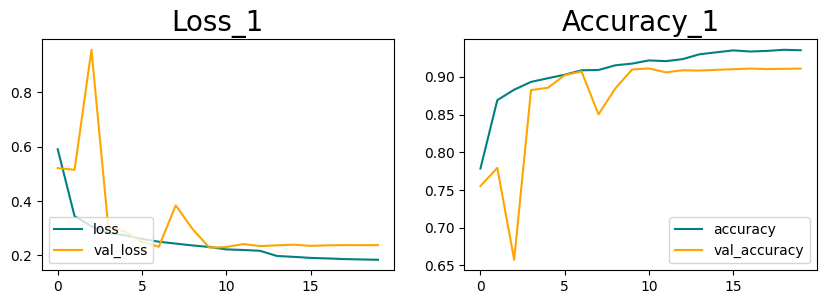

313/313 [==============================] - 2s 5ms/step
Epoch 1/50

Epoch 1: val_accuracy improved from inf to 0.65290, saving model to best_model_fold_2.h5
1250/1250 - 28s - loss: 0.5641 - accuracy: 0.7922 - val_loss: 0.8160 - val_accuracy: 0.6529 - lr: 0.0010 - 28s/epoch - 22ms/step
Epoch 2/50

Epoch 2: val_accuracy did not improve from 0.65290
1250/1250 - 25s - loss: 0.3330 - accuracy: 0.8709 - val_loss: 0.2361 - val_accuracy: 0.9101 - lr: 0.0010 - 25s/epoch - 20ms/step
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.65290
1250/1250 - 24s - loss: 0.3046 - accuracy: 0.8867 - val_loss: 0.2424 - val_accuracy: 0.9033 - lr: 0.0010 - 24s/epoch - 19ms/step
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.65290
1250/1250 - 25s - loss: 0.2852 - accuracy: 0.8933 - val_loss: 0.2847 - val_accuracy: 0.8841 - lr: 0.0010 - 25s/epoch - 20ms/step
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.65290
1250/1250 - 24s - loss: 0.2758 - accuracy: 0.8967 - val_loss: 0.2815 - val_a

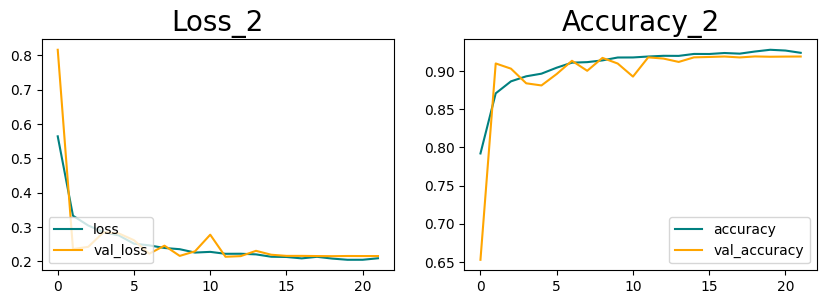

313/313 [==============================] - 3s 5ms/step
Epoch 1/50

Epoch 1: val_accuracy improved from inf to 0.89650, saving model to best_model_fold_3.h5
1250/1250 - 30s - loss: 0.5881 - accuracy: 0.7713 - val_loss: 0.2833 - val_accuracy: 0.8965 - lr: 0.0010 - 30s/epoch - 24ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.89650 to 0.83340, saving model to best_model_fold_3.h5
1250/1250 - 26s - loss: 0.3413 - accuracy: 0.8684 - val_loss: 0.3970 - val_accuracy: 0.8334 - lr: 0.0010 - 26s/epoch - 21ms/step
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.83340
1250/1250 - 25s - loss: 0.3098 - accuracy: 0.8820 - val_loss: 0.2500 - val_accuracy: 0.9014 - lr: 0.0010 - 25s/epoch - 20ms/step
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.83340
1250/1250 - 24s - loss: 0.2879 - accuracy: 0.8921 - val_loss: 0.3301 - val_accuracy: 0.8648 - lr: 0.0010 - 24s/epoch - 19ms/step
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.83340
1250/1250 - 24s - loss: 0.2698 - a

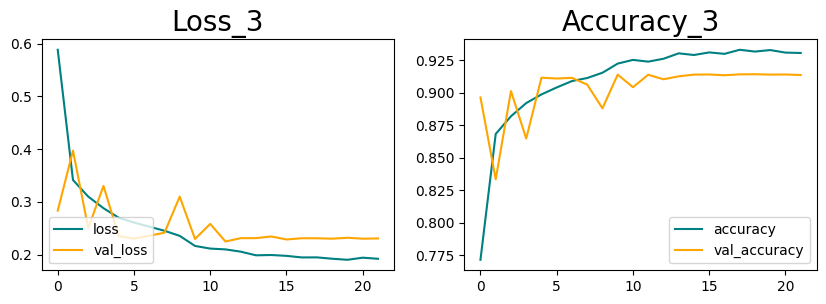

313/313 [==============================] - 2s 4ms/step
Epoch 1/50

Epoch 1: val_accuracy improved from inf to 0.82820, saving model to best_model_fold_4.h5
1250/1250 - 28s - loss: 0.5710 - accuracy: 0.7820 - val_loss: 0.3905 - val_accuracy: 0.8282 - lr: 0.0010 - 28s/epoch - 22ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.82820 to 0.82570, saving model to best_model_fold_4.h5
1250/1250 - 24s - loss: 0.3372 - accuracy: 0.8699 - val_loss: 0.4110 - val_accuracy: 0.8257 - lr: 0.0010 - 24s/epoch - 19ms/step
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.82570
1250/1250 - 25s - loss: 0.3055 - accuracy: 0.8840 - val_loss: 0.2360 - val_accuracy: 0.9068 - lr: 0.0010 - 25s/epoch - 20ms/step
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.82570
1250/1250 - 24s - loss: 0.2862 - accuracy: 0.8955 - val_loss: 0.2817 - val_accuracy: 0.8853 - lr: 0.0010 - 24s/epoch - 19ms/step
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.82570
1250/1250 - 25s - loss: 0.2708 - a

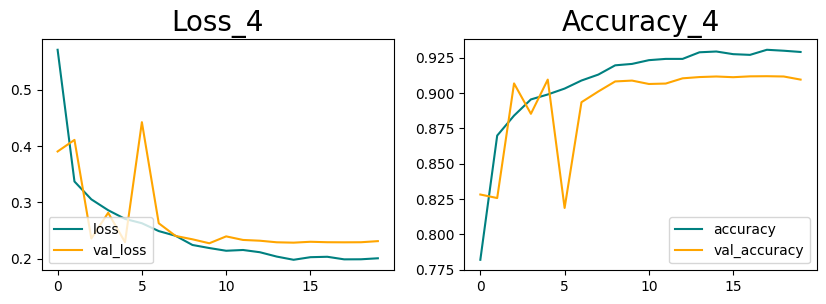

313/313 [==============================] - 2s 4ms/step
0.9088
Mean Accuracy: 0.9132
Standard Deviation of Accuracy: 0.0034322004603460922


In [43]:
# Define the number of stratified folds (k)
k = 5

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store evaluation results for each fold
accuracy_scores = []

# Perform stratified k-fold cross-validation
for fold_idx, (train_index, test_index) in enumerate(skf.split(X_padded, y)):
    X_train, X_val = X_padded[train_index], X_padded[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    # Create a new model for each fold
    model = create_model()

    # Compile the model
    optim = keras.optimizers.Adam(learning_rate=0.001)

    model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=f'best_model_fold_{fold_idx}.h5',
                                                             save_best_only=True,
                                                             monitor='val_accuracy',
                                                             mode='min',
                                                             verbose=2)                                                        
                                                            
    early_stopping = EarlyStopping(monitor='val_loss',  
                               patience=10,          
                               restore_best_weights=True)  # Restore model weights to the best seen during training
    
    lr_schedule = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-6)
    
    hist = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                     verbose=2,callbacks=[checkpoint_callback,early_stopping,lr_schedule])
    # Create a scatter plot for the Loss and Accuracy across the training process
    fig,ax = plt.subplots(1,2,figsize=(10,3))
    ax[0].plot(hist.history['loss'],color='teal',label='loss')
    ax[0].plot(hist.history['val_loss'],color='orange',label='val_loss')
    ax[0].set_title(f'Loss_{fold_idx}',fontsize=20)
    ax[0].legend(loc='lower left')

    ax[1].plot(hist.history['accuracy'],color='teal',label='accuracy')
    ax[1].plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
    ax[1].set_title(f'Accuracy_{fold_idx}',fontsize=20)
    ax[1].legend(loc='lower right')
    plt.show()

    # Make predictions on the validation data
    y_pred = model.predict(X_val)

    # Convert probabilities to binary predictions (0 or 1)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Evaluate the model's performance (e.g., accuracy)
    accuracy = accuracy_score(y_val, y_pred_binary)
    accuracy_scores.append(accuracy)

# Calculate the mean and standard deviation of accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(accuracy_scores)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

In [45]:
accuracy_scores

[0.9152, 0.9099, 0.9181, 0.914, 0.9088]